### PitchAngleAnisotropy
ピッチ角異方性についての議論を行いたい

大雑把に以下の傾向
* 低温のdip：特に90度付近に偏りがある．
* 高温のdip：90度を中心にだらっと分布
* tc：偏りがあまりない？

それぞれに分けて，90(80-100)度前後のfluxと距離の関係を出してみる？

In [2]:
import MDUS
from MDUS import Analysis

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [3]:
temperature = pd.read_pickle('./data/other/TemperatureAverage.pkl')
dip = MDUS.dip

In [6]:
# 各タイプについて，25MK以上，以下で分類
dip_over_25 = temperature.query('type == "dip" & T > 25').index.values
dip_under_25 = temperature.query('type == "dip" & T < 25').index.values
ns_over_25 = temperature.query('type == "ns" & T > 25').index.values
ns_under_25 = temperature.query('type == "ns" & T < 25').index.values
none_over_25 = temperature.query('type == "none" & T > 25').index.values
none_under_25 = temperature.query('type == "none" & T < 25').index.values

In [10]:
angle = [10, 30, 50, 70, 90, 110, 130, 150, 170]
orbits_dip_over_25 = []
orbits_dip_under_25 = []
orbits_ns_over_25 = []
orbits_ns_under_25 = []
orbits_none_over_25 = []
orbits_none_under_25 = []
rs_dip_over_25 = []
rs_dip_under_25 = []
rs_ns_over_25 = []
rs_ns_under_25 = []
rs_none_over_25 = []
rs_none_under_25 = []
xs_dip_over_25 = []
xs_dip_under_25 = []
xs_ns_over_25 = []
xs_ns_under_25 = []
xs_none_over_25 = []
xs_none_under_25 = []
ys_dip_over_25 = []
ys_dip_under_25 = []
ys_ns_over_25 = []
ys_ns_under_25 = []
ys_none_over_25 = []
ys_none_under_25 = []
fluxs_dip_over_25 = {}
fluxs_dip_under_25 = {}
fluxs_ns_over_25 = {}
fluxs_ns_under_25 = {}
fluxs_none_over_25 = {}
fluxs_none_under_25 = {}
for i in angle:
    fluxs_dip_over_25[i] = []
    fluxs_dip_under_25[i] = []
    fluxs_ns_over_25[i] = []
    fluxs_ns_under_25[i] = []
    fluxs_none_over_25[i] = []
    fluxs_none_under_25[i] = []


In [11]:
angle = [10, 30, 50, 70, 90, 110, 130, 150, 170]
rs = []
fluxs = []
for i in temperature.itertuples():
    orbit = i[0]
    print(orbit)
    # if  orbit not in [199]:
    # if orbit not in dip_over_25:
    #     continue
    # dataの読み込み
    data = MDUS.Datas()
    data.Input(orbit=orbit,inputdata=["mag","scan","pchang"])

    # 計算領域の抽出
    if orbit in dip.index:
        ds = dip.loc[orbit]['start']
        de = dip.loc[orbit]['end']
    else:
        # MLATの計算
        data.mag.MLAT() 
        dt = np.abs(data.mag.value.query("X_MSO <= 0"))["MLAT"].idxmin()
        ds = dt - pd.Timedelta("5min")   
        de = dt + pd.Timedelta("5min")
    
    # 距離の計算
    r = np.sqrt(i.X**2 + i.Y**2)
    # fluxの計算
    # 各ピッチ角に対して計算
    if data.pchang.value is None or data.pchang.value.query('@ds <= index <= @de').values.size == 0:
        continue
    # break
    for a in angle:
        l = [a-5,a+5]
        flux = np.nanmean(data.pchang.value.query('@ds <= index <= @de')[l].values)
        if orbit in dip_over_25:
            fluxs_dip_over_25[a].append(flux)
        elif orbit in dip_under_25:
            fluxs_dip_under_25[a].append(flux)
        elif orbit in ns_over_25:
            fluxs_ns_over_25[a].append(flux)
        elif orbit in ns_under_25:
            fluxs_ns_under_25[a].append(flux)
        elif orbit in none_over_25:
            fluxs_none_over_25[a].append(flux)
        elif orbit in none_under_25:
            fluxs_none_under_25[a].append(flux)
    if orbit in dip_over_25:
        rs_dip_over_25.append(r)
        xs_dip_over_25.append(i.X)
        ys_dip_over_25.append(i.Y)
        orbits_dip_over_25.append(orbit)
    elif orbit in dip_under_25:
        rs_dip_under_25.append(r)
        xs_dip_under_25.append(i.X)
        ys_dip_under_25.append(i.Y)
        orbits_dip_under_25.append(orbit)
    elif orbit in ns_over_25:
        rs_ns_over_25.append(r)
        xs_ns_over_25.append(i.X)
        ys_ns_over_25.append(i.Y)
        orbits_ns_over_25.append(orbit)
    elif orbit in ns_under_25:
        rs_ns_under_25.append(r)
        xs_ns_under_25.append(i.X)
        ys_ns_under_25.append(i.Y)
        orbits_ns_under_25.append(orbit)
    elif orbit in none_over_25:
        rs_none_over_25.append(r)
        xs_none_over_25.append(i.X)
        ys_none_over_25.append(i.Y)
        orbits_none_over_25.append(orbit)
    elif orbit in none_under_25:
        rs_none_under_25.append(r)
        xs_none_under_25.append(i.X)
        ys_none_under_25.append(i.Y)
        orbits_none_under_25.append(orbit)
    print('Done')
    del data

16
Done
17
Done
18
Done
19
Done
20
Done
21
Done
22
Done
23
Done
24
Done
25
Done
26
Done
27
Done
44
Done
45
Done
46
Done
47
Done
48
Done
49
Done
50
Done
51
Done
52
Done
53
Done
54
Done
55
Done
56
Done
57
Done
58
Done
59
Done
60
Done
61
Done
62
Done
63
Done
64
Done
65
Done
66
Done
67
Done
68
Done
69
Done
70
Done
71
Done
72
Done
73
Done
74
Done
75
Done
76
Done
77
Done
78
Done
79
Done
80
Done
81
Done
82
Done
83
Done
84
Done
85
Done
86
Done
87
Done
88
Done
89
Done
90
Done
91
Done
92
Done
93
Done
94
Done
95
Done
96
Done
97
Done
98
Done
99
Done
100
Done
101
Done
102
Done
103
Done
104
Done
105
Done
106
Done
107
Done
108
Done
109
Done
110
Done
111
Done
112
Done
113
Done
114
Done
115
Done
116
Done
117
Done
118
Done
119
Done
120
Done
121
Done
122
Done
123
Done
124
Done
125
Done
126
Done
127
Done
154
Done
155
Done
156
Done
157
Done
158
Done
159
Done
160
Done
161
Done
162
Done
163
Done
164
Done
165
Done
166
Done
167
Done
168
Done
169
Done
170
Done
171
Done
172
Done
173
Done
174
Done
175
Done
176
Do

In [14]:
result_dip_over_25 = pd.DataFrame()
result_dip_over_25['orbit'] = orbits_dip_over_25 
result_dip_over_25['r'] = rs_dip_over_25
result_dip_over_25['x'] = xs_dip_over_25
result_dip_over_25['y'] = ys_dip_over_25
for a in fluxs_dip_over_25.keys():
    result_dip_over_25[a] = fluxs_dip_over_25[a]
result_dip_over_25 = result_dip_over_25.set_index('orbit')
result_dip_over_25.to_pickle('./data/other/flux_dip_over_25.pkl')

result_dip_under_25 = pd.DataFrame()
result_dip_under_25['orbit'] = orbits_dip_under_25
result_dip_under_25['r'] = rs_dip_under_25
result_dip_under_25['x'] = xs_dip_under_25
result_dip_under_25['y'] = ys_dip_under_25
for a in fluxs_dip_under_25.keys():
    result_dip_under_25[a] = fluxs_dip_under_25[a]
result_dip_under_25 = result_dip_under_25.set_index('orbit')
result_dip_under_25.to_pickle('./data/other/flux_dip_under_25.pkl')

result_ns_over_25 = pd.DataFrame()
result_ns_over_25['orbit'] = orbits_ns_over_25
result_ns_over_25['r'] = rs_ns_over_25
result_ns_over_25['x'] = xs_ns_over_25
result_ns_over_25['y'] = ys_ns_over_25
for a in fluxs_ns_over_25.keys():
    result_ns_over_25[a] = fluxs_ns_over_25[a]
result_ns_over_25 = result_ns_over_25.set_index('orbit')
result_ns_over_25.to_pickle('./data/other/flux_ns_over_25.pkl')

result_ns_under_25 = pd.DataFrame()
result_ns_under_25['orbit'] = orbits_ns_under_25
result_ns_under_25['r'] = rs_ns_under_25
result_ns_under_25['x'] = xs_ns_under_25
result_ns_under_25['y'] = ys_ns_under_25
for a in fluxs_ns_under_25.keys():
    result_ns_under_25[a] = fluxs_ns_under_25[a]
result_ns_under_25 = result_ns_under_25.set_index('orbit')
result_ns_under_25.to_pickle('./data/other/flux_ns_under_25.pkl')

result_none_over_25 = pd.DataFrame()
result_none_over_25['orbit'] = orbits_none_over_25
result_none_over_25['r'] = rs_none_over_25
result_none_over_25['x'] = xs_none_over_25
result_none_over_25['y'] = ys_none_over_25
for a in fluxs_none_over_25.keys():
    result_none_over_25[a] = fluxs_none_over_25[a]
result_none_over_25 = result_none_over_25.set_index('orbit')
result_none_over_25.to_pickle('./data/other/flux_none_over_25.pkl')

result_none_under_25 = pd.DataFrame()
result_none_under_25['orbit'] = orbits_none_under_25
result_none_under_25['r'] = rs_none_under_25
result_none_under_25['x'] = xs_none_under_25
result_none_under_25['y'] = ys_none_under_25
for a in fluxs_none_under_25.keys():
    result_none_under_25[a] = fluxs_none_under_25[a]
result_none_under_25 = result_none_under_25.set_index('orbit')
result_none_under_25.to_pickle('./data/other/flux_none_under_25.pkl')

In [60]:
result_dip_over_25 = pd.read_pickle('./data/other/flux_dip_over_25.pkl')
result_dip_under_25 = pd.read_pickle('./data/other/flux_dip_under_25.pkl')
result_ns_over_25 = pd.read_pickle('./data/other/flux_ns_over_25.pkl')
result_ns_under_25 = pd.read_pickle('./data/other/flux_ns_under_25.pkl')
result_none_over_25 = pd.read_pickle('./data/other/flux_none_over_25.pkl')
result_none_under_25 = pd.read_pickle('./data/other/flux_none_under_25.pkl')
result_none = pd.concat([result_none_over_25,result_none_under_25])

In [49]:
angle_list = [10, 30, 50, 70, 90, 110, 130, 150, 170]
for a in angle_list:
    fig, ax = plt.subplots()
    ax.hist(result_dip_over_25[a], bins=np.logspace(7,11,50), alpha=1, 
            label='{:.3e}'.format(np.nanmean(result_dip_under_25[a])))
    ax.set_xscale('log')
    ax.set_xlabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.set_ylabel('Number of Events')
    ax.legend()
    ax.set_title('Dip Over 25MK' + '  (Pchang = {})'.format(a))
    plt.savefig('./figure/Pchang/hist_flux_dip_over_25_{}.png'.format(a),dpi=400)
    plt.close()

    fig, ax = plt.subplots()
    ax.hist(result_dip_under_25[a], bins=np.logspace(7,11,50), alpha=1, 
            label='{:.3e}'.format(np.nanmean(result_dip_under_25[a])))
    ax.set_xscale('log')
    ax.set_xlabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.set_ylabel('Number of Events')
    ax.legend()
    ax.set_title('Dip Under 25MK' + '  (Pchang = {})'.format(a))
    plt.savefig('./figure/Pchang/hist_flux_dip_under_25_{}.png'.format(a),dpi=400)
    plt.close()

    fig, ax = plt.subplots()
    ax.hist(result_ns_over_25[a], bins=np.logspace(7,11,50), alpha=1, 
            label='{:.3e}'.format(np.nanmean(result_ns_over_25[a])))
    ax.set_xscale('log')
    ax.set_xlabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.set_ylabel('Number of Events')
    ax.legend()
    ax.set_title('NS Over 25MK' + '  (Pchang = {})'.format(a))
    plt.savefig('./figure/Pchang/hist_flux_ns_over_25_{}.png'.format(a),dpi=400)
    plt.close()

    fig, ax = plt.subplots()
    ax.hist(result_ns_under_25[a], bins=np.logspace(7,11,50), alpha=1, 
            label='{:.3e}'.format(np.nanmean(result_ns_under_25[a])))
    ax.set_xscale('log')
    ax.set_xlabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.set_ylabel('Number of Events')
    ax.legend()
    ax.set_title('NS Under 25MK' + '  (Pchang = {})'.format(a))
    plt.savefig('./figure/Pchang/hist_flux_ns_under_25_{}.png'.format(a),dpi=400)
    plt.close()

    fig, ax = plt.subplots()
    ax.hist(result_none[a], bins=np.logspace(7,11,50), alpha=1, 
            label='{:.3e}'.format(np.nanmean(result_none[a])))
    ax.set_xscale('log')
    ax.set_xlabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.set_ylabel('Number of Events')
    ax.legend()
    ax.set_title('None' + '  (Pchang = {})'.format(a))

    plt.savefig('./figure/Pchang/hist_flux_none_{}.png'.format(a),dpi=400)
    plt.close()

    

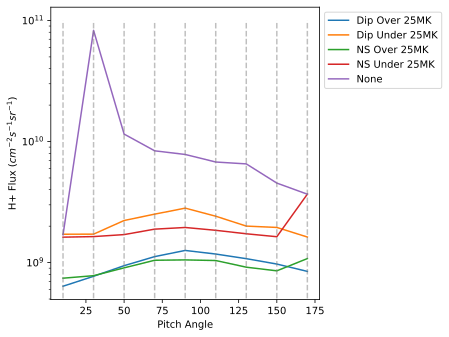

In [62]:
angle_list = [10, 30, 50, 70, 90, 110, 130, 150, 170]
flux_mean_dip_over_25 = []
flux_mean_dip_under_25 = []
flux_mean_ns_over_25 = []
flux_mean_ns_under_25 = []

flux_mean_none = []

for a in angle_list:
    flux_mean_dip_over_25.append(np.nanmean(result_dip_over_25[a]))
    flux_mean_dip_under_25.append(np.nanmean(result_dip_under_25[a]))
    flux_mean_ns_over_25.append(np.nanmean(result_ns_over_25[a]))
    flux_mean_ns_under_25.append(np.nanmean(result_ns_under_25[a]))
    flux_mean_none.append(np.nanmean(result_none[a]))

fig, ax = plt.subplots()
ax.plot(angle_list,flux_mean_dip_over_25, label='Dip Over 25MK')
ax.plot(angle_list,flux_mean_dip_under_25, label='Dip Under 25MK')
ax.plot(angle_list,flux_mean_ns_over_25, label='NS Over 25MK')
ax.plot(angle_list,flux_mean_ns_under_25, label='NS Under 25MK')
ax.plot(angle_list,flux_mean_none, label='None')

for a in angle_list:
    ax.plot([a,a],[0,1e11],color='grey',linestyle='--',alpha=0.5)

ax.set_xlabel('Pitch Angle')
ax.set_yscale('log')
ax.set_ylabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
fig.tight_layout()
plt.savefig('./figure/Pchang/flux_mean_all.png',dpi=400)

In [74]:
angle_list = [10, 30, 50, 70, 90, 110, 130, 150, 170]
for a in angle_list:
    fig, ax = plt.subplots()
    ax.scatter(result_dip_over_25['r'],result_dip_over_25[a],label='Pchang = {}'.format(a))
    ax.set_yscale('log')
    ax.set_ylim(ymin=1e8,ymax=1e11)
    ax.set_xlabel('r (Rm)')
    ax.set_ylabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.legend()
    ax.set_title('Dip Over 25MK' + '  (Pchang = {})'.format(a))
    fig.tight_layout()
    plt.savefig('./figure/Pchang/R_flux_dip_over_25_{}.png'.format(a),dpi=400)
    plt.close()
    
    fig, ax = plt.subplots()
    ax.scatter(result_dip_under_25['r'],result_dip_under_25[a],label='Pchang = {}'.format(a)) 
    ax.set_yscale('log')
    ax.set_ylim(ymin=1e8,ymax=1e11)
    ax.set_xlabel('r (Rm)')
    ax.set_ylabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.legend()
    ax.set_title('Dip Under 25MK' + '  (Pchang = {})'.format(a))
    fig.tight_layout()
    plt.savefig('./figure/Pchang/R_flux_dip_under_25_{}.png'.format(a),dpi=400)
    plt.close()

    fig, ax = plt.subplots()
    ax.scatter(result_ns_over_25['r'],result_ns_over_25[a],label='Pchang = {}'.format(a))
    ax.set_yscale('log')
    ax.set_ylim(ymin=1e8,ymax=1e11)
    ax.set_xlabel('r (Rm)')
    ax.set_ylabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.legend()
    ax.set_title('NS Over 25MK' + '  (Pchang = {})'.format(a))
    fig.tight_layout()
    plt.savefig('./figure/Pchang/R_flux_ns_over_25_{}.png'.format(a),dpi=400)
    plt.close()

    fig, ax = plt.subplots()
    ax.scatter(result_ns_under_25['r'],result_ns_under_25[a],label='Pchang = {}'.format(a))
    ax.set_yscale('log')
    ax.set_ylim(ymin=1e8,ymax=1e11)
    ax.set_xlabel('r (Rm)')
    ax.set_ylabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.legend()
    ax.set_title('NS Under 25MK' + '  (Pchang = {})'.format(a))
    fig.tight_layout()
    plt.savefig('./figure/Pchang/R_flux_ns_under_25_{}.png'.format(a),dpi=400)
    plt.close()

    fig, ax = plt.subplots()
    ax.scatter(result_none['r'],result_none[a],label='Pchang = {}'.format(a))
    ax.set_yscale('log')
    ax.set_ylim(ymin=1e8,ymax=1e11)
    ax.set_xlabel('r (Rm)')
    ax.set_ylabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.legend()
    ax.set_title('None' + '  (Pchang = {})'.format(a))
    fig.tight_layout()
    plt.savefig('./figure/Pchang/R_flux_none_{}.png'.format(a),dpi=400)
    plt.close()
    

In [90]:
from matplotlib.colors import LogNorm

angle_list = [10, 30, 50, 70, 90, 110, 130, 150, 170]
theta = np.linspace(0,2*np.pi,100)
for a in angle_list:
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.plot(np.cos(theta),np.sin(theta),color='grey',linestyle='--',alpha=0.5)
    cbar = ax.scatter(result_dip_over_25['x'],result_dip_over_25['y'],
               c = result_dip_over_25[a],cmap='jet',label='Pchang = {}'.format(a),
               norm=LogNorm(vmin=5e8,vmax=5e9))
    # カラーバーを表示
    fig.colorbar(cbar,ax=ax,label=r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.set_xlabel('X (Rm)')
    ax.set_ylabel('Y (Rm)')
    ax.set_title('Dip Over 25MK' + '  (Pchang = {})'.format(a))
    # ax.legend()
    ax.set_xlim(xmax=0,xmin=-3)
    ax.set_ylim(ymax=1.5,ymin=-1.5)
    fig.tight_layout()
    plt.savefig('./figure/Pchang/XY_flux_dip_over_25_{}.png'.format(a),dpi=400)
    plt.close()

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.plot(np.cos(theta),np.sin(theta),color='grey',linestyle='--',alpha=0.5)
    cbar = ax.scatter(result_dip_under_25['x'],result_dip_under_25['y'],
               c = result_dip_under_25[a],cmap='jet',label='Pchang = {}'.format(a),
               norm=LogNorm(vmin=1e9,vmax=1e10))
    # カラーバーを表示
    fig.colorbar(cbar,ax=ax,label=r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.set_xlabel('X (Rm)')
    ax.set_ylabel('Y (Rm)')
    ax.set_title('Dip Under 25MK' + '  (Pchang = {})'.format(a))
    # ax.legend()
    ax.set_xlim(xmax=0,xmin=-3)
    ax.set_ylim(ymax=1.5,ymin=-1.5)
    fig.tight_layout()
    plt.savefig('./figure/Pchang/XY_flux_dip_under_25_{}.png'.format(a),dpi=400)
    plt.close()

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.plot(np.cos(theta),np.sin(theta),color='grey',linestyle='--',alpha=0.5)
    cbar = ax.scatter(result_ns_over_25['x'],result_ns_over_25['y'],
               c = result_ns_over_25[a],cmap='jet',label='Pchang = {}'.format(a),
               norm=LogNorm(vmin=5e8,vmax=5e9))
    # カラーバーを表示
    fig.colorbar(cbar,ax=ax,label=r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.set_xlabel('X (Rm)')
    ax.set_ylabel('Y (Rm)')
    ax.set_title('NS Over 25MK' + '  (Pchang = {})'.format(a))
    # ax.legend()
    ax.set_xlim(xmax=0,xmin=-3)
    ax.set_ylim(ymax=1.5,ymin=-1.5)
    fig.tight_layout()
    plt.savefig('./figure/Pchang/XY_flux_ns_over_25_{}.png'.format(a),dpi=400)
    plt.close()

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.plot(np.cos(theta),np.sin(theta),color='grey',linestyle='--',alpha=0.5)
    cbar = ax.scatter(result_ns_under_25['x'],result_ns_under_25['y'],
               c = result_ns_under_25[a],cmap='jet',label='Pchang = {}'.format(a),
               norm=LogNorm(vmin=1e9,vmax=1e10))
    # カラーバーを表示
    fig.colorbar(cbar,ax=ax,label=r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.set_xlabel('X (Rm)')
    ax.set_ylabel('Y (Rm)')
    ax.set_title('NS Under 25MK' + '  (Pchang = {})'.format(a))
    # ax.legend()
    ax.set_xlim(xmax=0,xmin=-3)
    ax.set_ylim(ymax=1.5,ymin=-1.5)
    fig.tight_layout()
    plt.savefig('./figure/Pchang/XY_flux_ns_under_25_{}.png'.format(a),dpi=400)
    plt.close()

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.plot(np.cos(theta),np.sin(theta),color='grey',linestyle='--',alpha=0.5)
    cbar = ax.scatter(result_none['x'],result_none['y'],
               c = result_none[a],cmap='jet',label='Pchang = {}'.format(a),
               norm=LogNorm(vmin=1e9,vmax=5e11))
    # カラーバーを表示
    fig.colorbar(cbar,ax=ax,label=r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
    ax.set_xlabel('X (Rm)')
    ax.set_ylabel('Y (Rm)')
    ax.set_title('None' + '  (Pchang = {})'.format(a))
    # ax.legend()
    ax.set_xlim(xmax=0,xmin=-3)
    ax.set_ylim(ymax=1.5,ymin=-1.5)
    fig.tight_layout()
    plt.savefig('./figure/Pchang/XY_flux_none_{}.png'.format(a),dpi=400)
    plt.close()
    

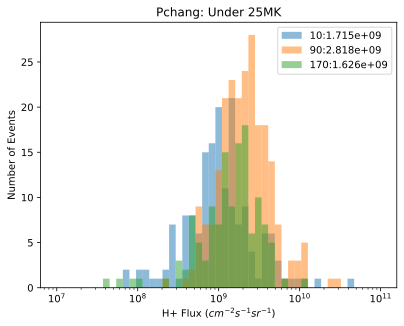

In [33]:
angle_list = [10,90,170]
fig, ax  = plt.subplots()
for a in angle_list:
    ax.hist(result_dip_under_25[a],bins=np.logspace(7,11,50),alpha=0.5,
            label=str(a) + ':'  +'{:.3e}'.format(np.nanmean(result_dip_under_25[a])))
ax.set_xscale('log')
ax.set_xlabel(r'H+ Flux $(cm^{-2} s^{-1} sr^{-1})$')
ax.set_ylabel('Number of Events')
ax.set_title('Pchang: Under 25MK')
ax.legend()

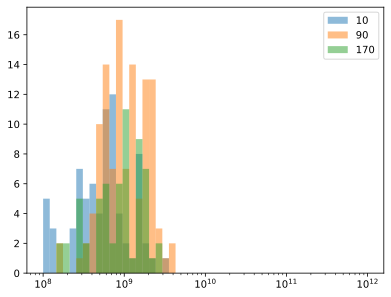

In [145]:
angle_list = [10,90,170]
edges = np.linspace(0,1e11,10)
fig, ax = plt.subplots()
for a in fluxs_dip_over_25:
    if a not in angle_list:
        continue
    ax.hist(x=fluxs_dip_over_25[a],bins=np.logspace(8,12,50),label=a,alpha=0.5)
ax.set_xscale('log')
ax.legend()

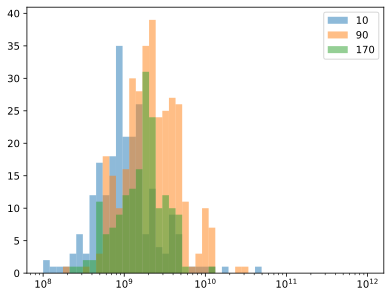

In [147]:
angle_list = [10,90,170]
edges = np.linspace(0,1e11,10)
fig, ax = plt.subplots()
for a in fluxs_dip_under_25:
    if a not in angle_list:
        continue
    ax.hist(x=fluxs_dip_under_25[a],bins=np.logspace(8,12,50),label=a,alpha=0.5)
ax.set_xscale('log')
ax.legend()

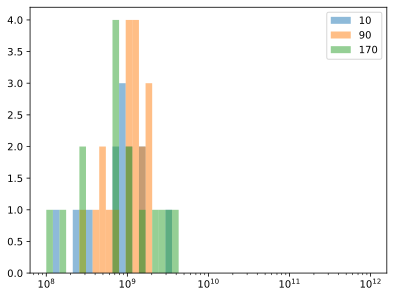

In [148]:
angle_list = [10,90,170]
edges = np.linspace(0,1e11,10)
fig, ax = plt.subplots()
for a in fluxs_ns_over_25:
    if a not in angle_list:
        continue
    ax.hist(x=fluxs_ns_over_25[a],bins=np.logspace(8,12,50),label=a,alpha=0.5)
ax.set_xscale('log')
ax.legend()

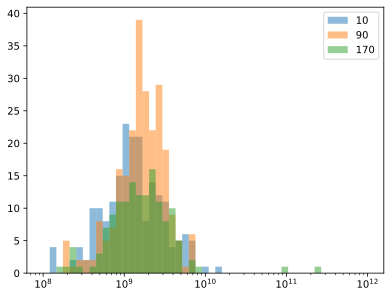

In [149]:
angle_list = [10,90,170]
edges = np.linspace(0,1e11,10)
fig, ax = plt.subplots()
for a in fluxs_ns_under_25:
    if a not in angle_list:
        continue
    ax.hist(x=fluxs_ns_under_25[a],bins=np.logspace(8,12,50),label=a,alpha=0.5)
ax.set_xscale('log')
ax.legend()

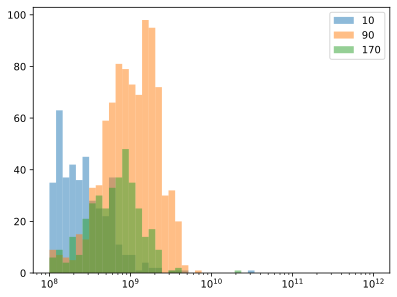

In [150]:
angle_list = [10,90,170]
edges = np.linspace(0,1e11,10)
fig, ax = plt.subplots()
for a in fluxs_none_over_25:
    if a not in angle_list:
        continue
    ax.hist(x=fluxs_none_over_25[a],bins=np.logspace(8,12,50),label=a,alpha=0.5)
ax.set_xscale('log')
ax.legend()

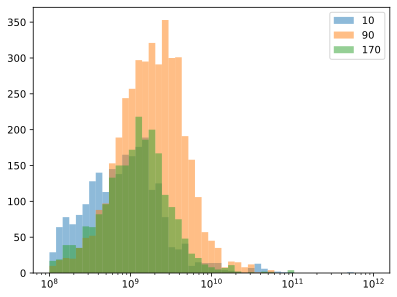

In [151]:
angle_list = [10,90,170]
edges = np.linspace(0,1e11,10)
fig, ax = plt.subplots()
for a in fluxs_none_under_25:
    if a not in angle_list:
        continue
    ax.hist(x=fluxs_none_under_25[a],bins=np.logspace(8,12,50),label=a,alpha=0.5)
ax.set_xscale('log')
ax.legend()

In [ ]:
fig, ax = plt.subplots()
# ax.hist(rs)
ax.hist(fluxs)

In [ ]:
fig, ax = plt.subplots()
# ax.scatter(rs, fluxs)
ax.hist(fluxs)